In [1]:
#Import the library
import numpy as np
import pandas as pd

In [2]:
df=pd.ExcelFile(r'C:\Users\User\Downloads\Employee-dataset.xlsx')
df1=df.parse('Existing employees')
df1.insert(10, 'has_left', 'No')
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,has_left
0,2001,0.58,0.74,4,215,3,0,0,sales,low,No
1,2002,0.82,0.67,2,202,3,0,0,sales,low,No
2,2003,0.45,0.69,5,193,3,0,0,sales,low,No
3,2004,0.78,0.82,5,247,3,0,0,sales,low,No
4,2005,0.49,0.60,3,214,2,0,0,sales,low,No


In [3]:
df2=df.parse('Employees who have left')
df2.insert(10, 'has_left', 'Yes')
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,has_left
0,1,0.38,0.53,2,157,3,0,0,sales,low,Yes
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Yes
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Yes
3,4,0.72,0.87,5,223,5,0,0,sales,low,Yes
4,5,0.37,0.52,2,159,3,0,0,sales,low,Yes


In [4]:
dataset = pd.concat([df1, df2], ignore_index=True,sort=False)#joined the 2 datasets together
dataset.head()
dataset.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,has_left
14994,14995,0.40,0.57,2,151,3,0,0,support,low,Yes
14995,14996,0.37,0.48,2,160,3,0,0,support,low,Yes
14996,14997,0.37,0.53,2,143,3,0,0,support,low,Yes
14997,14998,0.11,0.96,6,280,4,0,0,support,low,Yes
14998,14999,0.37,0.52,2,158,3,0,0,support,low,Yes


In [5]:
has_left = dataset.groupby('has_left')
has_left.mean()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
has_left,,,,,,,,
No,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
Yes,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


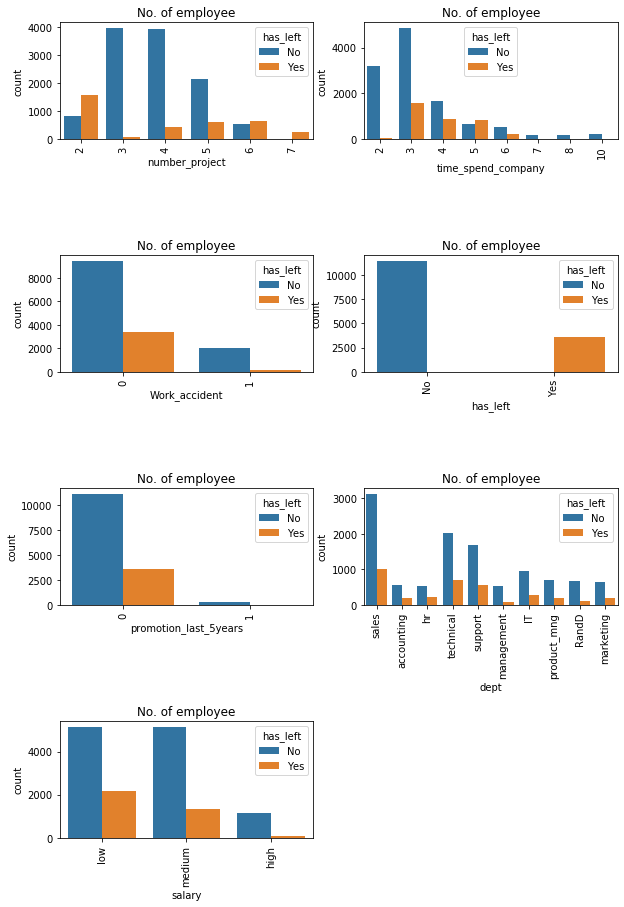

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
features=['number_project','time_spend_company','Work_accident','has_left', 'promotion_last_5years','dept','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = dataset, hue='has_left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")


# The visualization interpretation
Employees with 3 to 5 projects stay back while those with less than 3 and greater than 6 projects leave the company
Employees that has spent 5 years in the company tend to leave and after 5 years they relax and not leave again,5 years is the peak of their career
Most of the employees have not gotten promotion last 5 years and this could be the raeson of them leaving at the 5th year


In [8]:
dataset = dataset.sample(frac=1.0)# Reshuffled the joined dataset
dataset.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,has_left
11178,13962,0.39,0.45,3,100,8,1,0,product_mng,medium,No
10577,13361,0.28,0.44,4,170,2,0,0,support,low,No
10551,13335,0.99,0.86,3,167,2,0,0,sales,low,No
2545,4546,0.82,0.89,4,196,3,0,1,technical,medium,No
12336,909,0.92,1.00,5,259,5,0,0,IT,low,Yes


In [9]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['dept'], prefix='dept',dummy_na=True)],axis=1).drop(['dept'],axis=1)
dataset = pd.concat([dataset,pd.get_dummies(dataset['salary'], prefix='salary',dummy_na=True)],axis=1).drop(['salary'],axis=1)

In [10]:
dataset['has_left'] = dataset['has_left'].map({'No': 0, 'Yes': 1})

In [11]:
dataset.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,has_left,dept_IT,...,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,dept_nan,salary_high,salary_low,salary_medium,salary_nan
11178,13962,0.39,0.45,3,100,8,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10577,13361,0.28,0.44,4,170,2,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
10551,13335,0.99,0.86,3,167,2,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2545,4546,0.82,0.89,4,196,3,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
12336,909,0.92,1.00,5,259,5,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [12]:
columns=['dept_nan','salary_nan']
dataset.drop(columns=columns, axis=1, inplace=True)

In [13]:
correlations = dataset.corr()['has_left'].sort_values()
print(correlations)

satisfaction_level      -0.388375
Work_accident           -0.154622
Emp ID                  -0.129047
salary_high             -0.120929
salary_medium           -0.068833
promotion_last_5years   -0.061788
dept_RandD              -0.046596
dept_management         -0.046035
dept_product_mng        -0.011029
dept_IT                 -0.010925
dept_marketing          -0.000859
last_evaluation          0.006567
dept_sales               0.009923
dept_support             0.010700
dept_accounting          0.015201
dept_technical           0.020076
number_project           0.023787
dept_hr                  0.028249
average_montly_hours     0.071287
salary_low               0.134722
time_spend_company       0.144822
has_left                 1.000000
Name: has_left, dtype: float64


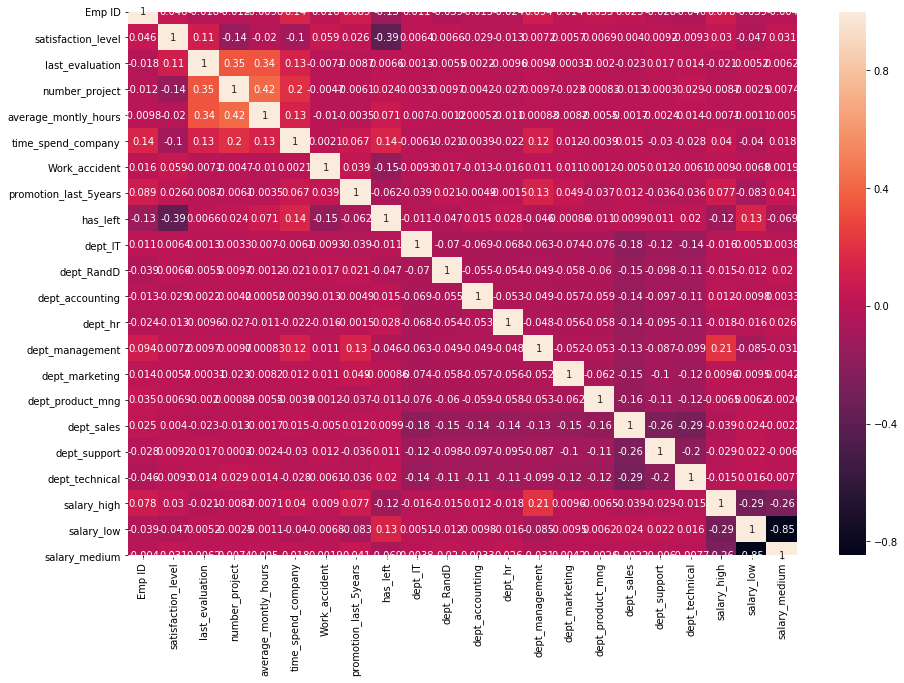

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(), annot=True)

In [15]:
X=dataset.drop(['has_left', 'Emp ID'], axis=1)
Y=dataset['has_left']

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.22196861 0.11242784 0.26488107 0.14254183 0.17813767 0.01793797
 0.00293716 0.00313625 0.00332684 0.00299496 0.00356434 0.00237884
 0.00225511 0.0028334  0.0056224  0.00420599 0.00526655 0.00709002
 0.01208682 0.00440634]


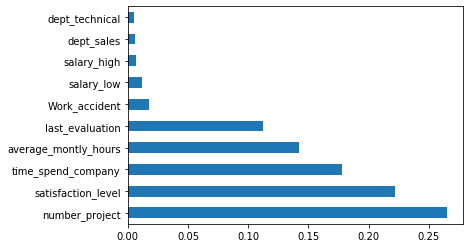

In [16]:
#plot graph of feature importances for better visualization
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [17]:
has_left = dataset.groupby('has_left')
has_left.mean()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
has_left,,,,,,,,,,,,,,,,,,,,,
0,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.083479,0.058278,...,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021,0.101068,0.450123,0.448810
1,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.076449,0.033884,...,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183,0.022963,0.608233,0.368804


In [18]:
#splitting of the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3,random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((10499, 20), (4500, 20), (10499,), (4500,))

In [19]:
#scikit learn decision tree model training 
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',min_samples_split=2,min_samples_leaf=1,
                             max_features='auto',random_state=0)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)


In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[3358   91]
 [  45 1006]]


In [21]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test,Y_pred ))  
print(accuracy_score(Y_test, Y_pred ))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3449
           1       0.92      0.96      0.94      1051

    accuracy                           0.97      4500
   macro avg       0.95      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500

0.9697777777777777


In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, Y_train)  
predictions = classifier.predict(X_test)
print(predictions)

[0 0 0 ... 1 0 1]


In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, Y_train)  
predictions = classifier.predict(X_test)


In [24]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test,predictions ))  
print(accuracy_score(Y_test,predictions ))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3449
           1       0.99      0.98      0.98      1051

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500

0.9922222222222222


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
grad.fit(X_train, Y_train)
y_pred2 = grad.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test,y_pred2 ))  
print(accuracy_score(Y_test, y_pred2 ))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3449
           1       0.96      0.94      0.95      1051

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500

0.9768888888888889


Random forest classifier gave the highest accuracy,therefore gave the best model